In [2]:
import matplotlib.pyplot as plt
from cache import cache_list_dir

Loaded: 'cache\runs\taboo\2c89668f-3ed6-4de6-b4cc-39e90d5d255f\run_data.pickle'.
Loaded: 'cache\runs\taboo\31d76ecd-1f2a-4678-b374-67d2206b164e\run_data.pickle'.
Loaded: 'cache\runs\taboo\347c6d20-bf4c-42b1-820a-b6e0be1332bb\run_data.pickle'.
Loaded: 'cache\runs\taboo\4b2449d8-1fda-448e-8bbd-edba5a958fe9\run_data.pickle'.
Loaded: 'cache\runs\taboo\5166ea3d-c07f-40c1-a8a6-6e70487eb259\run_data.pickle'.
Loaded: 'cache\runs\taboo\5bd6cabb-c388-4435-8e02-d1d94337bc05\run_data.pickle'.
Loaded: 'cache\runs\taboo\617d2319-e291-461f-a8a6-c2de3f9c9220\run_data.pickle'.
Loaded: 'cache\runs\taboo\7626d7dd-79c6-43fe-acec-35e9c0360283\run_data.pickle'.
Loaded: 'cache\runs\taboo\8a74f0bd-b8f0-4b45-909b-df0fc81d05bd\run_data.pickle'.
Loaded: 'cache\runs\taboo\a35f8e7e-c0b9-4cc8-9961-0ca03c62be2a\run_data.pickle'.
Loaded: 'cache\runs\taboo\a8e7e957-09ec-4648-b3a3-9763a096d5ab\run_data.pickle'.
Loaded: 'cache\runs\taboo\afaef93e-2372-4983-b75b-7a1c2e068142\run_data.pickle'.
Loaded: 'cache\runs\taboo\bc

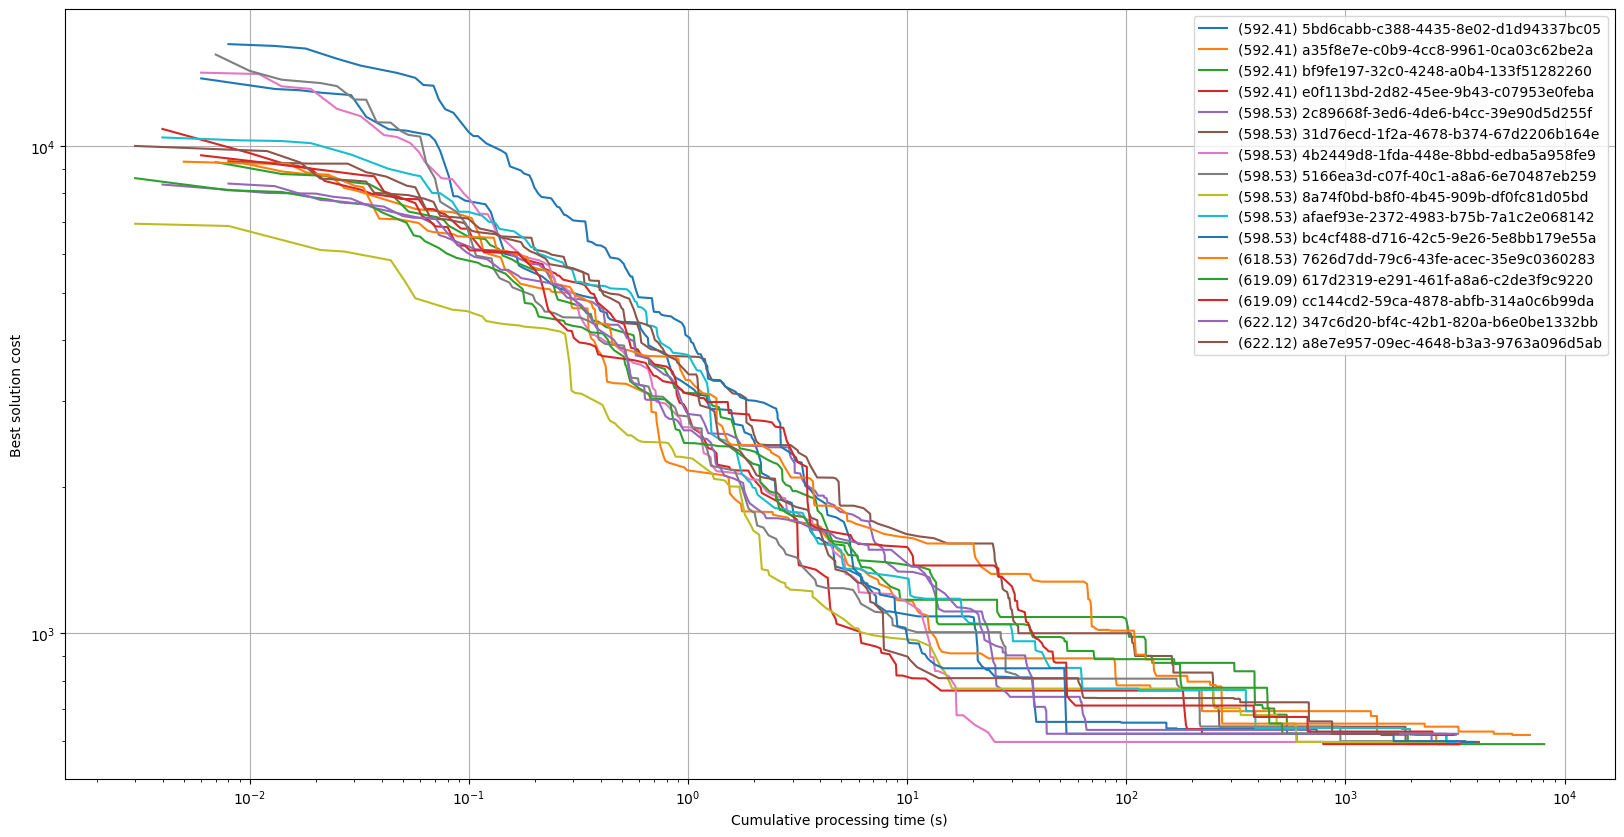

In [7]:
from os import path

from cache import load
from heuristics_improvement import HeuristicRunData


plt.figure(figsize=(20,10))
plt.xlabel('Cumulative processing time (s)')
plt.ylabel('Best solution cost')
plt.grid()
plt.yscale('log')
plt.xscale('log')

cache_dir = 'runs'
for improver in ['taboo']:
    # Order runs by best cost 
    for run_id, run_data in sorted([(run_id, load(path.join(cache_dir, improver, run_id, 'run_data'))) for run_id in cache_list_dir(path.join(cache_dir, improver))], key = lambda data: data[1].best.cost):

        # Caclculate running best
        running_times = []
        for i, iter in enumerate(run_data.iterations):
            if i == 0:
                running_times += [iter.time]
                continue
            running_times += [iter.time + running_times[i - 1]]
            
        # Calculate running best
        running_best_cost = []
        for i in run_data.iterations:
            if len(running_best_cost) < 1 or i.cost < running_best_cost[-1]:
                running_best_cost.append(i.cost)
            else:
                running_best_cost.append(running_best_cost[-1])


        plt.plot(running_times, running_best_cost, '-', markersize = 1, label = f'({run_data.best.cost:.2f}) ' + run_id)

plt.legend()
plt.show()

In [44]:
from itertools import groupby
improver = 'taboo'
runs = [(run_id, load(path.join(cache_dir, improver, run_id, 'run_data'))) for run_id in cache_list_dir(path.join(cache_dir, improver))]
sorted_runs = sorted(runs, key = lambda run: run[1].best.cost)
for cost, runs in groupby(sorted_runs, lambda data: round(data[1].best.cost, 0)):
    print(f'\n{cost:.2f}')
    for run in runs:
        print(run[0])
        print(run[1].best)
        print()

Loaded: 'cache\runs\taboo\2c89668f-3ed6-4de6-b4cc-39e90d5d255f\run_data.pickle'.
Loaded: 'cache\runs\taboo\31d76ecd-1f2a-4678-b374-67d2206b164e\run_data.pickle'.
Loaded: 'cache\runs\taboo\347c6d20-bf4c-42b1-820a-b6e0be1332bb\run_data.pickle'.
Loaded: 'cache\runs\taboo\4b2449d8-1fda-448e-8bbd-edba5a958fe9\run_data.pickle'.
Loaded: 'cache\runs\taboo\5166ea3d-c07f-40c1-a8a6-6e70487eb259\run_data.pickle'.
Loaded: 'cache\runs\taboo\5bd6cabb-c388-4435-8e02-d1d94337bc05\run_data.pickle'.
Loaded: 'cache\runs\taboo\617d2319-e291-461f-a8a6-c2de3f9c9220\run_data.pickle'.
Loaded: 'cache\runs\taboo\7626d7dd-79c6-43fe-acec-35e9c0360283\run_data.pickle'.
Loaded: 'cache\runs\taboo\8a74f0bd-b8f0-4b45-909b-df0fc81d05bd\run_data.pickle'.
Loaded: 'cache\runs\taboo\a35f8e7e-c0b9-4cc8-9961-0ca03c62be2a\run_data.pickle'.
Loaded: 'cache\runs\taboo\a8e7e957-09ec-4648-b3a3-9763a096d5ab\run_data.pickle'.
Loaded: 'cache\runs\taboo\afaef93e-2372-4983-b75b-7a1c2e068142\run_data.pickle'.
Loaded: 'cache\runs\taboo\bc

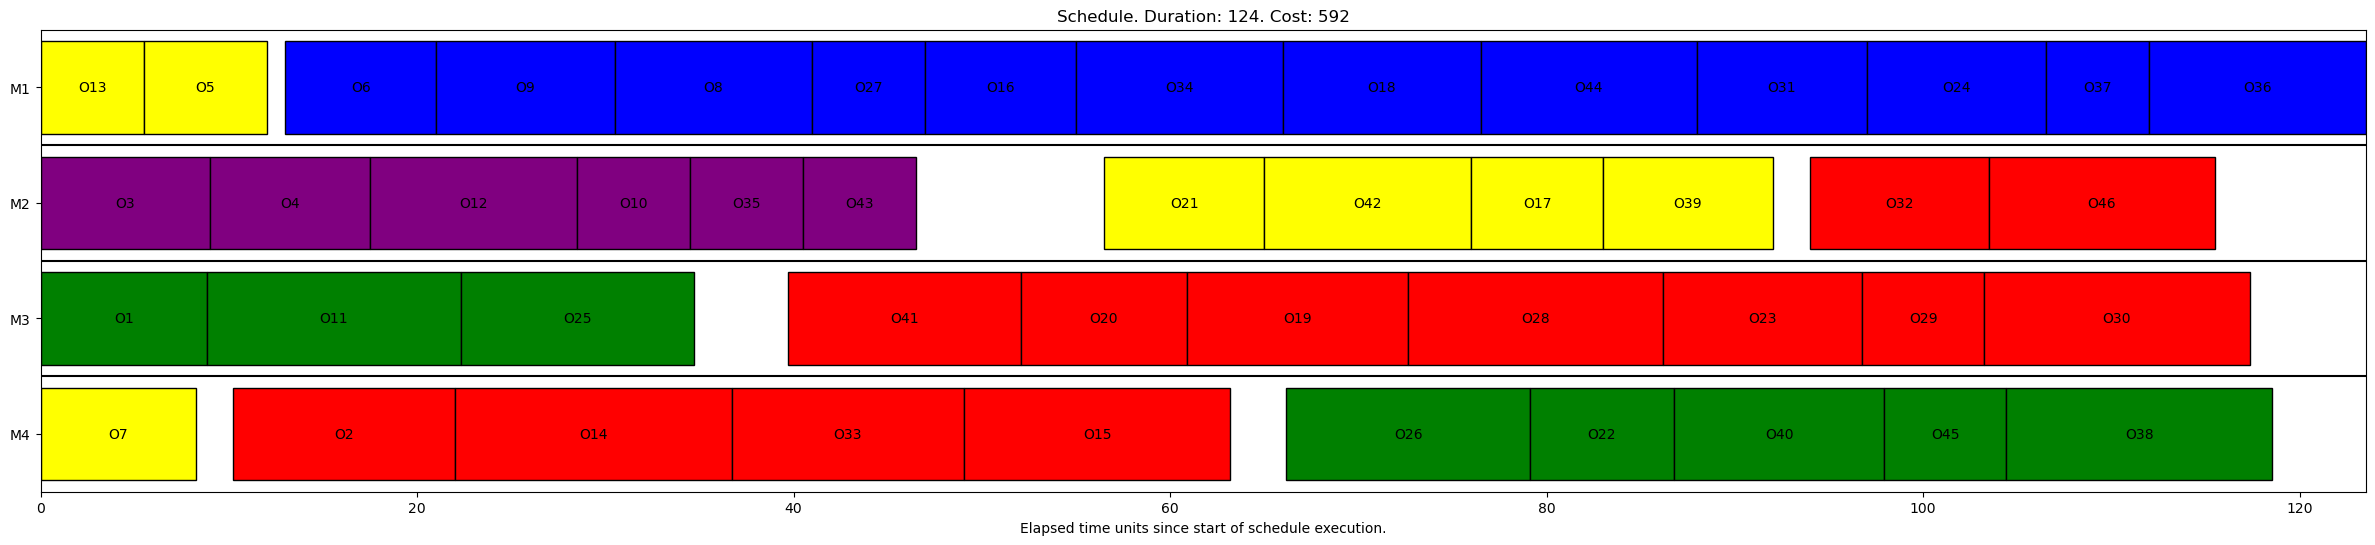

In [40]:
sorted_runs[0][1].best.plot()

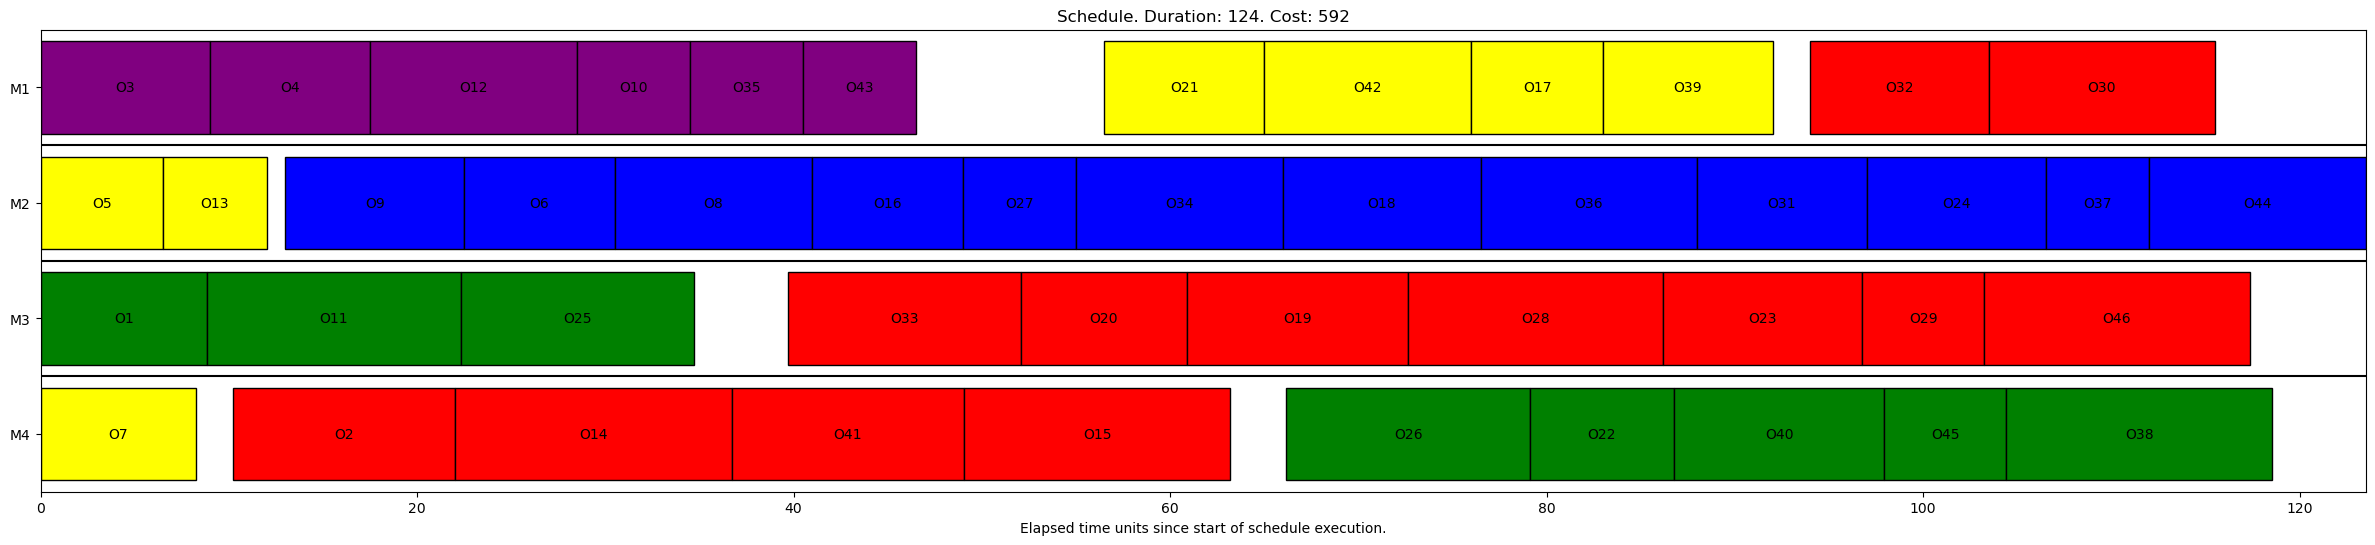

In [41]:
sorted_runs[1][1].best.plot()

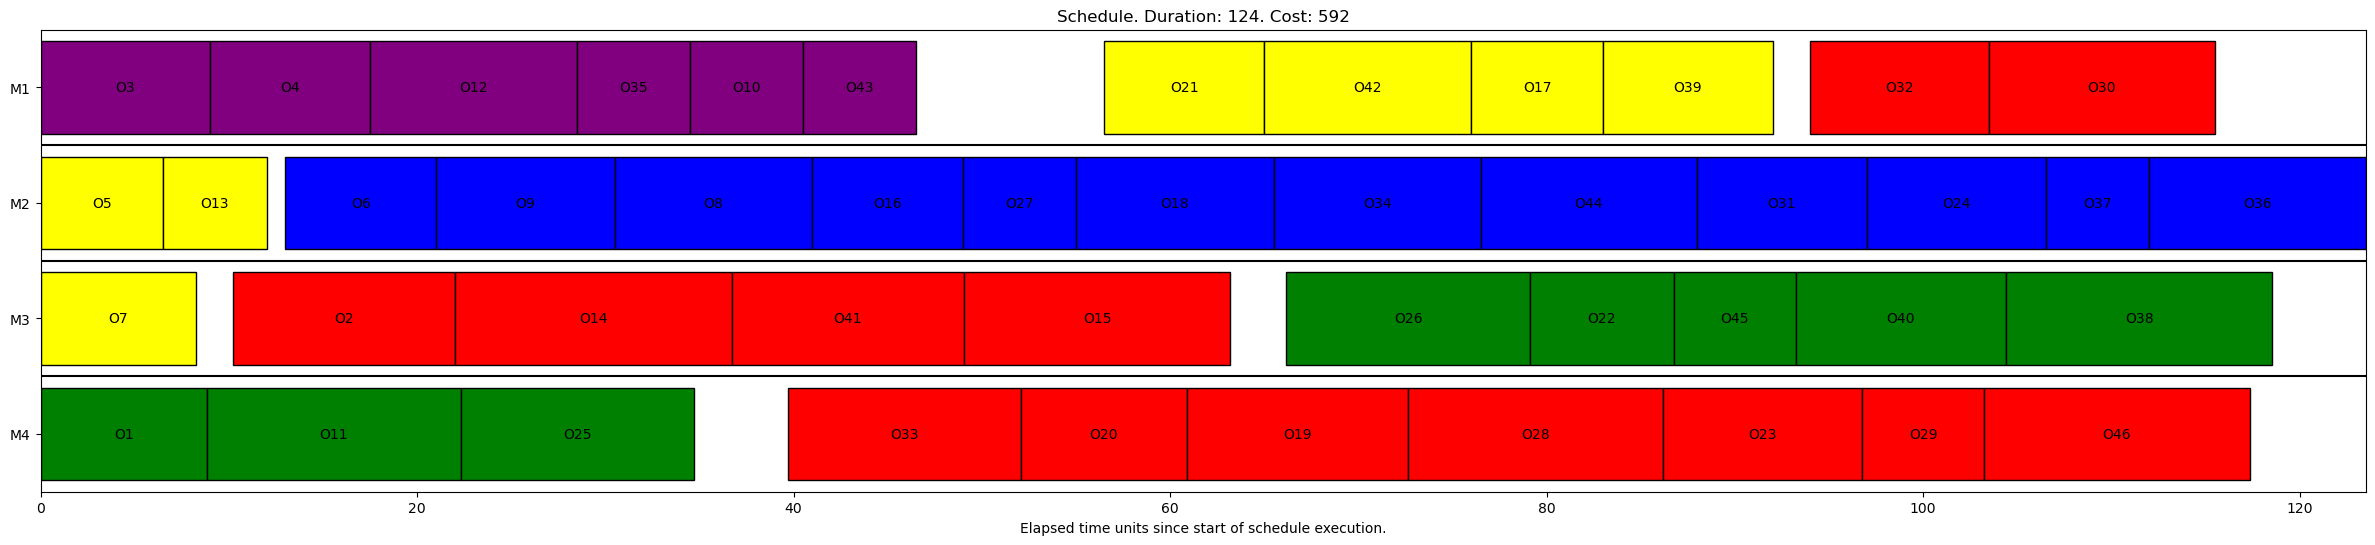

In [42]:
sorted_runs[2][1].best.plot()

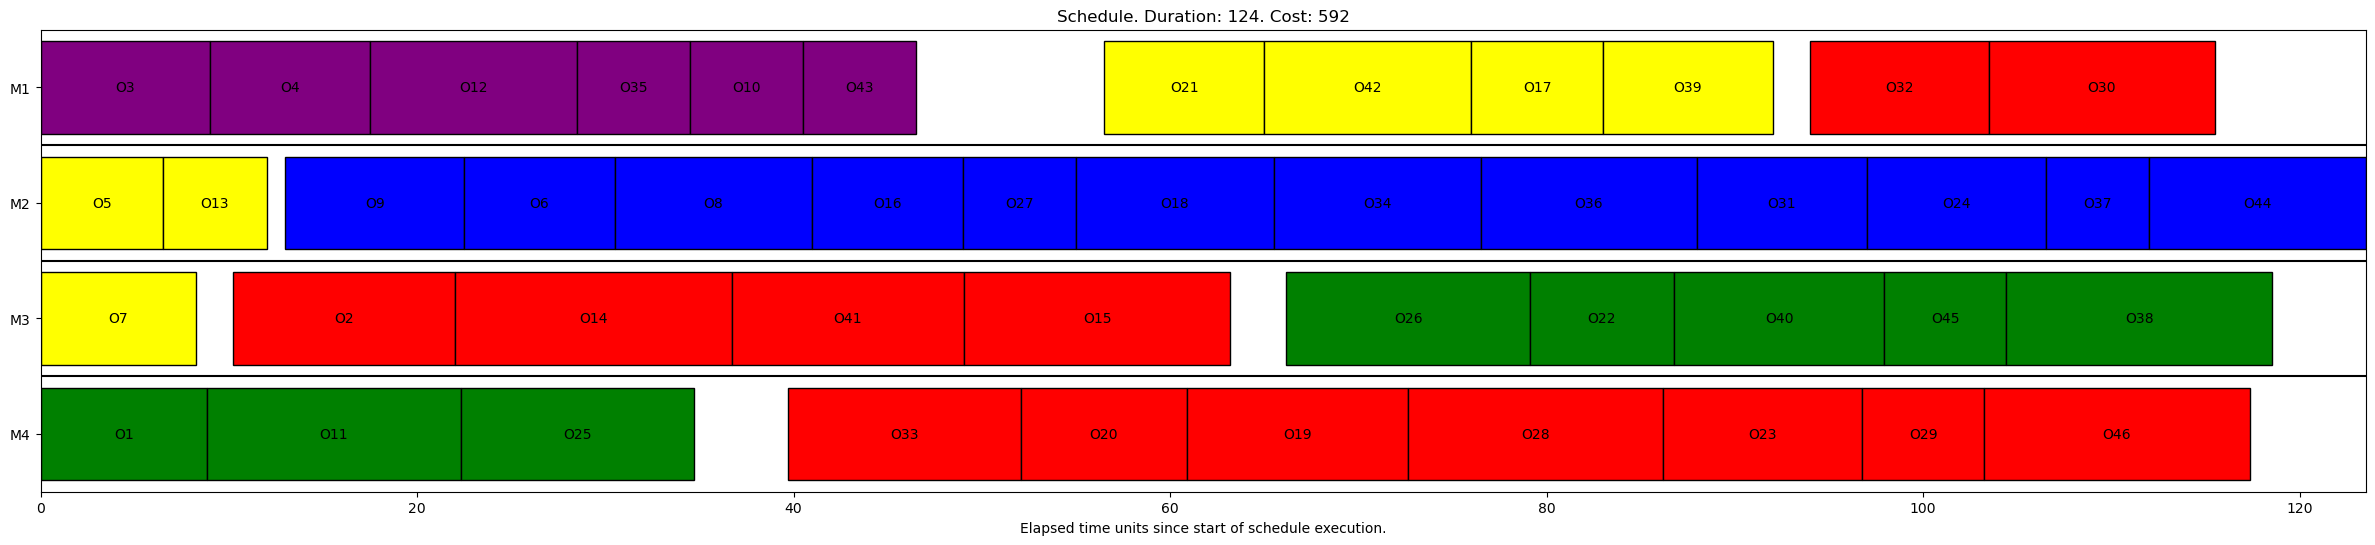

In [43]:
sorted_runs[3][1].best.plot()